<br><br><br>

<center><img src="img/numpy-logo.png" width="30%"></center>

<br><br><br>

In [44]:
# Fundamental data type: Numpy array
import numpy, uproot
print(numpy.arange(20), end="\n\n")
print(numpy.linspace(-5, 5, 21), end="\n\n")
print(numpy.empty(10000, numpy.float16), end="\n\n")
print(numpy.full((2, 7), 999), end="\n\n")
print(numpy.random.normal(-1, 0.0001, 10000), end="\n\n")
print(uproot.open("data/Zmumu.root")["events"]["E1"].array())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]

[-6.199e-05 -3.799e-01        nan ... -2.920e-01  3.323e-01 -1.752e+00]

[[999 999 999 999 999 999 999]
 [999 999 999 999 999 999 999]]

[-1.0000768  -0.99993585 -0.99995632 ... -0.99995043 -1.00000071
 -0.99985817]

[82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]


<br><br>

<center><img src="img/numpy-memory-layout.png" width="90%"></center>

<br><br>

In [68]:
a = numpy.array([2**30, 2**30 + 2**26, -1, 0, 2**30 + 2**24, 2**30 + 2**20], numpy.int32)
# a = a.view(numpy.float32)
# a = a.reshape((2, 3))
# a = a.astype(numpy.int64)

print("data:\n", a, end="\n\n")
print("type:", type(a), end="\n\n")
print("dtype (type of the data it contains):", a.dtype, end="\n\n")
print("shape: (size of each dimension):", a.shape, end="\n\n")

data:
 [1073741824 1140850688         -1          0 1090519040 1074790400]

type: <class 'numpy.ndarray'>

dtype (type of the data it contains): int32

shape: (size of each dimension): (6,)



In [51]:
# Exercise: move the digits from the left to the right using only view and astype.
# https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

a = numpy.array([[0, 0, 0, 1],          #       [[1, 0, 0, 0],
                 [0, 0, 0, 2],          #        [2, 0, 0, 0],
                 [0, 0, 0, 3],          #  -->   [3, 0, 0, 0],
                 [0, 0, 0, 4],          #        [4, 0, 0, 0],
                 [0, 0, 0, 5]], "i1")   #        [5, 0, 0, 0]]

a

array([[1, 0, 0, 0],
       [2, 0, 0, 0],
       [3, 0, 0, 0],
       [4, 0, 0, 0],
       [5, 0, 0, 0]], dtype=int8)

In [45]:
# Any mathematical function that would map scalar arguments to a scalar result
#                                      maps array arguments to an array result.

a_array = numpy.random.uniform(5, 10, 10000);     a_scalar = a_array[0]
b_array = numpy.random.uniform(10, 20, 10000);    b_scalar = b_array[0]
c_array = numpy.random.uniform(-0.1, 0.1, 10000); c_scalar = c_array[0]

def quadratic_formula(a, b, c):
    return (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

print("scalar:\n", quadratic_formula(a_scalar, b_scalar, c_scalar), end="\n\n")
print("array:\n",  quadratic_formula(a_array,  b_array,  c_array), end="\n\n")

scalar:
 -0.006103779006261416

array:
 [-0.00610378 -0.00325014  0.00168913 ...  0.00332879  0.00297344
 -0.00076656]



In [7]:
# Each step in the calculation is performed over whole arrays before moving on to the next.

a, b, c = a_array, b_array, c_array

roots1 = (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

tmp1 = numpy.negative(b)            # -b
tmp2 = numpy.square(b)              # b**2
tmp3 = numpy.multiply(4, a)         # 4*a
tmp4 = numpy.multiply(tmp3, c)      # tmp3*c
tmp5 = numpy.subtract(tmp2, tmp4)   # tmp2 - tmp4
tmp6 = numpy.sqrt(tmp5)             # sqrt(tmp5)
tmp7 = numpy.add(tmp1, tmp6)        # tmp1 + tmp6
tmp8 = numpy.multiply(2, a)         # 2*a
roots2 = numpy.divide(tmp7, tmp8)   # tmp7 / tmp8

roots1, roots2

(array([ 0.00496327,  0.00707392, -0.00071447, ...,  0.00027547,
        -0.00507138,  0.0011779 ]),
 array([ 0.00496327,  0.00707392, -0.00071447, ...,  0.00027547,
        -0.00507138,  0.0011779 ]))

In [8]:
# Even comparison operators are element-by-element.

roots1 == roots2

array([ True,  True,  True, ...,  True,  True,  True])

In [9]:
# So use a reducer (e.g. sum, max, min, any, all) to turn the array into a scalar.

(roots1 == roots2).all()

True

In [67]:
# Exercise: compute 1-dimensional projections of the 2-dimensional block in each direction.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html

block = numpy.histogram2d(numpy.random.normal(0, 1, 10000),
                          numpy.random.uniform(0, 1, 10000),
                          range=((-5, 5), (0, 1)))[0].astype(int)
print(block)

block.sum()

[[  0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   1   0   1   0   1   2   2]
 [ 19  16  27  21  20  20  17  17  19  18]
 [140 142 129 121 159 119 127 136 147 125]
 [315 329 347 321 343 355 369 361 319 367]
 [325 386 353 333 306 364 326 351 322 344]
 [138 140 148 151 119 152 132 127 139 135]
 [ 12  21  25  24  21  23  27  24  16  22]
 [  2   2   1   2   2   4   2   0   2   2]
 [  0   0   0   0   0   0   0   0   0   0]]


10000

<br><br>

<center><img src="img/numpy-memory-broadcasting.png" width="75%"></center>

<br><br>

In [22]:
E, px, py, pz = uproot.open("data/Zmumu.root")["events"].arrays(["E1", "p[xyz]1"], outputtype=tuple)

#                   array   array   array   scalar
energy = numpy.sqrt(px**2 + py**2 + pz**2 + 0.1056583745**2)
energy, E

(array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]))

<br><br>

<center><img src="img/numpy-memory-broadcasting2.png" width="75%"></center>

<br><br>

In [95]:
# Exercise: insert the Minkowski signature to correct this calculation of muon mass.

fourvectors = numpy.dstack([E, px, py, pz]).reshape(-1, 4)
print("             E           px          py            pz")
print(fourvectors)

# should be [0.1056583745, 0.1056583745, 0.1056583745, ...]
numpy.sqrt((fourvectors**2).sum(axis=1))

             E           px          py            pz
[[ 82.20186639 -41.19528764  17.4332439  -68.96496181]
 [ 62.34492895  35.11804977 -16.57036233 -48.77524654]
 [ 62.34492895  35.11804977 -16.57036233 -48.77524654]
 ...
 [ 81.27013558  32.37749196   1.19940578 -74.53243061]
 [ 81.27013558  32.37749196   1.19940578 -74.53243061]
 [ 81.56621735  32.48539387   1.2013503  -74.80837247]]


array([116.25094628,  88.16898076,  88.16898076, ..., 114.93327938,
       114.93327938, 115.35200242])

<br><br><br><br><br>

# Numpy slicing

<br><br><br><br><br>

In [122]:
# Basic array slicing is the same as Python list slicing

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

for expr in "a[3]      ", "a[3:]     ", "a[:3]     ", "a[3:7]    ", "a[3:7:2]  ", "a[::2]    ":
    print(expr, "=", eval(expr))

print()
for expr in "a[-3]     ", "a[-3:]    ", "a[:-3]    ", "a[-7:-3]  ", "a[-7:-3:2]", "a[::-1]   ":
    print(expr, "=", eval(expr))

a[3]       = 3.3
a[3:]      = [3.3 4.4 5.5 6.6 7.7 8.8 9.9]
a[:3]      = [0.  1.1 2.2]
a[3:7]     = [3.3 4.4 5.5 6.6]
a[3:7:2]   = [3.3 5.5]
a[::2]     = [0.  2.2 4.4 6.6 8.8]

a[-3]      = 7.7
a[-3:]     = [7.7 8.8 9.9]
a[:-3]     = [0.  1.1 2.2 3.3 4.4 5.5 6.6]
a[-7:-3]   = [3.3 4.4 5.5 6.6]
a[-7:-3:2] = [3.3 5.5]
a[::-1]    = [9.9 8.8 7.7 6.6 5.5 4.4 3.3 2.2 1.1 0. ]


In [123]:
# But multidimensional arrays can be sliced with an extension of this syntax.
a = numpy.array([[ 0,  1,  2,  3,  4,  5],
                 [10, 11, 12, 13, 14, 15],
                 [20, 21, 22, 23, 24, 25],
                 [30, 31, 32, 33, 34, 35]])
for expr in "a[2:, 1:]", "a[:, 1:-1]", "a[::2, ::2]", "a[:, 3]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[2:, 1:] =
[[21 22 23 24 25]
 [31 32 33 34 35]]

a[:, 1:-1] =
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]

a[::2, ::2] =
[[ 0  2  4]
 [20 22 24]]

a[:, 3] =
[ 3 13 23 33]



<center><img src="img/numpy-slicing.png" width="40%"></center>

In [97]:
# Exercise: move the digits from the left to the right using only a slice.

a = numpy.array([[0, 0, 0, 1],          #       [[1, 0, 0, 0],
                 [0, 0, 0, 2],          #        [2, 0, 0, 0],
                 [0, 0, 0, 3],          #  -->   [3, 0, 0, 0],
                 [0, 0, 0, 4],          #        [4, 0, 0, 0],
                 [0, 0, 0, 5]], "i1")   #        [5, 0, 0, 0]]

a

array([[0, 0, 0, 1],
       [0, 0, 0, 2],
       [0, 0, 0, 3],
       [0, 0, 0, 4],
       [0, 0, 0, 5]], dtype=int8)

In [124]:
# Exercise: slice "a" so that it is identical to "b"

a = numpy.arange(30).reshape((3, 2, 5))
b = numpy.array([[4, 9], [24, 29]])

asliced = a   # a[?, ?, ?]

print("a[?, ?, ?] =", asliced, sep="\n", end="\n\n")
print("b =", b, sep="\n")

a[?, ?, ?] =
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]

b =
[[ 4  9]
 [24 29]]


In [125]:
# Remember mass[Q1 != Q2]? That was a special case of (advanced) slicing:

a    = numpy.array([  0.0,   1.1,   2.2,   3.3,   4.4,  5.5,   6.6,  7.7,   8.8,  9.9])
mask = numpy.array([False, False, False, False, False, True, False, True, False, True])
#                                                       5.5          7.7          9.9

for expr in "a[mask]", "a < 5", "a[a < 5]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[mask] =
[5.5 7.7 9.9]

a < 5 =
[ True  True  True  True  True False False False False False]

a[a < 5] =
[0.  1.1 2.2 3.3 4.4]



dict_keys(['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'])


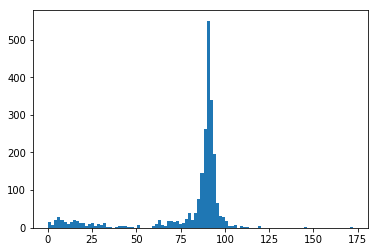

In [28]:
# Exercise: plot masses with (1) opposite charges and (2) both muon abs(eta) < 1

arrays = uproot.open("data/Zmumu.root")["events"].arrays(namedecode="utf-8")
print(arrays.keys())
for n in arrays:
    exec(f"{n} = arrays['{n}']")

%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.hist(M, bins=100);

In [130]:
# Arrays of integers can also be used as indexes.

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

print("selects elements, possibly out of order")
index = numpy.array([3, 5, 0, 9])
print("a[[3, 5, 0, 9]] =", a[index])

print("\nmay use negative indexing, just like single integers and slices")
index = numpy.array([3, 5, 0, -1, -2, -3])
print("a[[3, 5, 0, -1, -2, -3]] =", a[index])

print("\nmay include repetitions(!)")
index = numpy.array([3, 5, 0, 9, 9, 9, 3, 5, 0])
print("a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] =", a[index])

selects elements, possibly out of order
a[[3, 5, 0, 9]] = [3.3 5.5 0.  9.9]

may use negative indexing, just like single integers and slices
a[[3, 5, 0, -1, -2, -3]] = [3.3 5.5 0.  9.9 8.8 7.7]

may include repetitions(!)
a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] = [3.3 5.5 0.  9.9 9.9 9.9 3.3 5.5 0. ]


In [131]:
# What is integer indexing good for?

permutation = etaZ.argsort()                            # try also abs(etaZ).argsort()

print(f"\n\npermutation:\n{permutation}")

print(f"\n\nsorted etaZ:\n{etaZ[permutation]}")

print(f"\n\nmasses sorted by etaZ:\n{masses[permutation]}")



permutation:
[ 594   71 1447 ...  564  561 1332]


sorted etaZ:
[-2.20861271 -2.15576398 -2.06939557 ...  2.09490763  2.09549142
  2.23921074]


masses sorted by etaZ:
[1.38595961 0.61617839 6.70683147 ... 1.31566591 1.32027808 1.75907992]


In [132]:
# Exercise: dense array → sparse array → dense array.

dense1 = numpy.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 4, 1, 0, 3, 0,
                      1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) * 1.1

sparse_indexes = numpy.nonzero(dense1)[0]
sparse_values  = dense1[sparse_indexes]
print("sparse indexes:", sparse_indexes, "\nsparse values: ", sparse_values)

dense2 = numpy.zeros(len(dense1))
# dense2[???] = ???                       # what do you need to put on this line
print("dense:", dense1, sep="\n")         # to get dense2 == dense1 printed on this line?

sparse indexes: [37 38 40 45 46 48 50 51 53 58] 
sparse values:  [1.1 2.2 1.1 4.4 1.1 3.3 1.1 2.2 1.1 1.1]
dense:
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  1.1 2.2 0.  1.1 0.  0.  0.  0.  4.4 1.1 0.  3.3 0.  1.1 2.2 0.  1.1
 0.  0.  0.  0.  1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [133]:
# Just as masking with booleans is a generalization of slicing...

def slice2mask(a, s):
    start, stop, step = s.indices(len(a))
    if step > 0:
        return numpy.array([start <= i < stop and (i - start) % step == 0 for i in range(len(a))])
    else:
        raise ValueError("masking is only a generalization of slices with positive steps")

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

s = slice(3, None, 2)   # equivalent to [3::2]

mask = slice2mask(a, s)

print("mask    =", mask)
print("a[s]    =", a[s])
print("a[mask] =", a[mask])

mask    = [False False False  True False  True False  True False  True]
a[s]    = [3.3 5.5 7.7 9.9]
a[mask] = [3.3 5.5 7.7 9.9]


In [134]:
# ...indexing with integers is a generalization of masking.

def mask2index(mask):
    return numpy.nonzero(mask)[0]

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

mask = [False, False, False, True, False, True, False, True, False, True]

index = mask2index(mask)

print("index    =", index)
print("a[mask]  =", a[mask])
print("a[index] =", a[index])

index    = [3 5 7 9]
a[mask]  = [3.3 5.5 7.7 9.9]
a[index] = [3.3 5.5 7.7 9.9]


In [135]:
# Indexing with integers is also like composing functions of integers from 0 up to array length.

def f(x):
    return x**2 - 5*x + 10                              # some non-negative function

def g(y):
    return max(0, 2*y - 10) + 3                         # another non-negative function

F   = numpy.array([f(i) for i in numpy.arange(10)])     # sample f at 10 elements
G   = numpy.array([g(i) for i in numpy.arange(100)])    # sample g at enough elements to include max(f)
GoF = numpy.array([g(f(i)) for i in numpy.arange(10)])  # sample g∘f at 10 elements

print("G\u2218F =", G[F])
print("g\u2218f =", GoF)

G∘F = [13  5  3  3  5 13 25 41 61 85]
g∘f = [13  5  3  3  5 13 25 41 61 85]


In [136]:
# Integer indexing is surprisingly versatile: consider this text corpous (removing punctuation).

text = """Four score and seven years ago our fathers brought forth on this continent, a new nation,
conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and
so dedicated, can long endure. We are met on a great battle-field of that war. We have come to
dedicate a portion of that field, as a final resting place for those who here gave their lives that
that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The
brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add
or detract. The world will little note, nor long remember what we say here, but it can never forget
what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which
they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the
great task remaining before us—that from these honored dead we take increased devotion to that cause
for which they gave the last full measure of devotion—that we here highly resolve that these dead
shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that
government of the people, by the people, for the people, shall not perish from the earth."""

words = text.replace(".", " ").replace(",", " ").replace("-", " ").replace("\u2014", " ").split()

In [137]:
# Dictionary encoding: for compression or textual analysis (e.g. with machine learning).

words = numpy.array(words)
dictionary, index = numpy.unique(words, return_inverse=True)

print("len(words) =", len(words), "\nwords[:25] =\n" + str(words[:25]))
print("\nlen(dictionary) =", len(dictionary), "\ndictionary[:25] =\n" + str(dictionary[:25]))
print("\nlen(index) =", len(index), "\nindex[:25] =\n" + str(index[:25]))

len(words) = 272 
words[:25] =
['Four' 'score' 'and' 'seven' 'years' 'ago' 'our' 'fathers' 'brought'
 'forth' 'on' 'this' 'continent' 'a' 'new' 'nation' 'conceived' 'in'
 'Liberty' 'and' 'dedicated' 'to' 'the' 'proposition' 'that']

len(dictionary) = 142 
dictionary[:25] =
['But' 'Four' 'God' 'It' 'Liberty' 'Now' 'The' 'We' 'a' 'above' 'add'
 'advanced' 'ago' 'all' 'altogether' 'and' 'any' 'are' 'as' 'battle' 'be'
 'before' 'birth' 'brave' 'brought']

len(index) = 272 
index[:25] =
[  1 109  15 111 141  12  94  49  24  55  92 124  34   8  86  84  31  69
   4  15  38 127 120 102 119]


In [98]:
# Exercise: restore the original text using only indexing.
# 
# index             : positions in corpus → integer codes
# dictionary        : integer codes       → words



<br><br>

<p style="font-size: 2em">Summary of slicing</p>

   * **if X is an integer:** selects individual elements;
   * **if X is a slice:** selects a contiguous or regularly strided subrange (strides can be backward);
   * **if X is a tuple** (any commas between square brackets): applies selections to multiple dimensions;
   * **if X is a boolean array:** filters arbitrarily chosen elements (preserving order);
   * **if X is an integer array:** applies a function of integers, arbitrarily chosen, in any order, and may have duplicates.

<br>

See [Numpy's advanced indexing documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing) for more. (I didn't talk about slicing by a tuple of arrays or assigning to slices.)

<br><br><br>

<center><img src="img/pandas-logo.png" width="30%"></center>

<br><br><br>

In [102]:
# Pandas organizes Numpy operations into convenient tables.

df = uproot.open("data/Zmumu.root")["events"].pandas.df()
df

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
entry,,,,,,,,,,,,,,,,,,,,
0,b'GT',148031,10507008,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,82.462692
1,b'TT',148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,83.626204
2,b'GT',148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.217690,2.741260,1,83.308465
3,b'GG',148031,10507008,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.217690,2.741260,1,82.149373
4,b'GT',148031,105238546,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.444340,-2.707650,-1,90.469123
5,b'TT',148031,105238546,48.981407,-19.862307,-9.204225,43.817098,21.8913,1.444340,-2.707650,-1,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,89.757663
6,b'GT',148031,105238546,48.981407,-19.862307,-9.204225,43.817098,21.8913,1.444340,-2.707650,-1,41.841299,22.790561,15.040756,-31.702509,27.2981,-0.990688,0.583351,1,89.773943
7,b'GG',148031,105238546,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.444340,-2.707650,-1,41.841299,22.790561,15.040756,-31.702509,27.2981,-0.990688,0.583351,1,90.485532
8,b'GT',148031,105485643,132.780755,71.143711,29.542308,-108.150553,77.0336,-1.140270,0.393582,1,87.795659,50.870937,-51.669728,-49.502056,72.7634,-0.637934,-0.793162,-1,91.773701


In [103]:
df.M

entry
0       82.462692
1       83.626204
2       83.308465
3       82.149373
4       90.469123
5       89.757663
6       89.773943
7       90.485532
8       91.773701
9       91.948820
10      91.704015
11      91.529367
12      94.648246
13      94.530698
14      94.589928
15      94.707550
16      68.409455
17      68.229367
18      68.354329
19      68.534747
20      89.308803
21      89.240535
22      89.307437
23      89.375756
24      95.270823
25      95.142274
26      95.049968
27      95.178392
28      91.626217
29      91.621042
          ...    
2274    62.051885
2275    62.013961
2276    88.662634
2277    88.483938
2278    88.534378
2279    88.713176
2280    90.077032
2281    90.091001
2282    90.097261
2283    90.083292
2284    92.699207
2285    92.742267
2286    92.844814
2287    92.801706
2288    90.075784
2289    90.212596
2290    90.494971
2291    90.357731
2292    88.624610
2293    88.503902
2294    88.517002
2295    88.637728
2296    60.077367
2297    60.053853
2298

In [104]:
df[["M", "Q1", "Q2"]]

,M,Q1,Q2
entry,,,
0,82.462692,1,-1
1,83.626204,-1,1
2,83.308465,-1,1
3,82.149373,-1,1
4,90.469123,1,-1
5,89.757663,-1,1
6,89.773943,-1,1
7,90.485532,-1,1
8,91.773701,1,-1


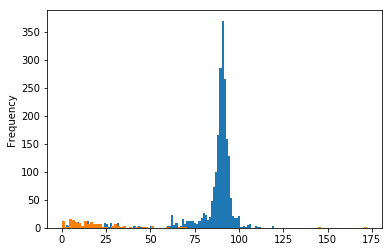

In [106]:
# Pandas features, like vectorized operations and masking, are really just Numpy features.
# Pandas also adds data analysis conveniences: built-in plotting, statistical functions, etc.

df.M[df.Q1 != df.Q2].plot.hist(bins=100);
df.M[df.Q1 == df.Q2].plot.hist(bins=100);

In [140]:
# Better illustration of what Pandas can do and is good for: get Chicago weather from NOAA...
# 
# Ick—what format is that? Fixed width???

!wget https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00111577.dly -q -O - | head

wget: /home/pivarski/miniconda3/lib/libuuid.so.1: no version information available (required by wget)
USC00111577192802TMAX-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999      39  0-9999   -9999   
USC00111577192802TMIN-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     -28  0-9999   -9999   
USC00111577192802PRCP-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0T 0-9999   -9999   
USC00111577192802SNOW-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -99

In [202]:
# It doesn't take much to munge that into something readable.
# https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt

import pandas
df = pandas.read_fwf("https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00111577.dly",
                     widths=[11, 4, 2, 4,
                             5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
                             5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
                             5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3],
                     names=["station", "year", "month", "quantity",
                            "day1", "flg1", "day2", "flg2", "day3", "flg3", "day4", "flg4", "day5", "flg5",
                            "day6", "flg6", "day7", "flg7", "day8", "flg8", "day9", "flg9", "day10", "flg10",
                            "day11", "flg11", "day12", "flg12", "day13", "flg13", "day14", "flg14", "day15", "flg15",
                            "day16", "flg16", "day17", "flg17", "day18", "flg18", "day19", "flg19", "day20", "flg20",
                            "day21", "flg21", "day22", "flg22", "day23", "flg23", "day24", "flg24", "day25", "flg25",
                            "day26", "flg26", "day27", "flg27", "day28", "flg28", "day29", "flg29", "day30", "flg30",
                            "day31", "flg31"])
df

,station,year,month,quantity,day1,flg1,day2,flg2,day3,flg3,...,day27,flg27,day28,flg28,day29,flg29,day30,flg30,day31,flg31
0,USC00111577,1928,2,TMAX,-9999,NaN,-9999,NaN,-9999,NaN,...,-9999,NaN,-9999,NaN,39,0,-9999,NaN,NaN,NaN
1,USC00111577,1928,2,TMIN,-9999,NaN,-9999,NaN,-9999,NaN,...,-9999,NaN,-9999,NaN,-28,0,-9999,NaN,NaN,NaN
2,USC00111577,1928,2,PRCP,-9999,NaN,-9999,NaN,-9999,NaN,...,-9999,NaN,-9999,NaN,0,T 0,-9999,NaN,NaN,NaN
3,USC00111577,1928,2,SNOW,-9999,NaN,-9999,NaN,-9999,NaN,...,-9999,NaN,-9999,NaN,0,T 0,-9999,NaN,NaN,NaN
4,USC00111577,1928,2,SNWD,-9999,NaN,-9999,NaN,-9999,NaN,...,-9999,NaN,-9999,NaN,0,0,-9999,NaN,NaN,NaN
5,USC00111577,1928,3,TMAX,22,0,56,0,28,0,...,-6,0,33,0,17,0,22,0,NaN,NaN
6,USC00111577,1928,3,TMIN,-67,0,-39,0,-94,0,...,-78,0,-33,0,-11,0,-28,0,NaN,NaN
7,USC00111577,1928,3,PRCP,0,T 0,0,T 0,0,0,...,0,0,0,T 0,89,0,25,0,NaN,NaN
8,USC00111577,1928,3,SNOW,0,T 0,0,T 0,0,0,...,8,0,0,0,107,0,30,0,NaN,NaN
9,USC00111577,1928,3,SNWD,0,T 0,0,T 0,0,0,...,0,T 0,0,T 0,25,0,0,T 0,NaN,NaN


In [203]:
# Of course, it's all formatted wrong: we want each quantity to be in a separate table
# and days of the month to be in rows like the year and month are.
# 
# Start by indexing the table by year and month: note the two-level structure.

df = df.set_index(["year", "month"])
df

station quantity  day1 flg1  day2 flg2  day3 flg3  day4 flg4  \
year month                                                                     
1928 2      USC00111577     TMAX -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     2      USC00111577     TMIN -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     2      USC00111577     PRCP -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     2      USC00111577     SNOW -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     2      USC00111577     SNWD -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     3      USC00111577     TMAX    22    0    56    0    28    0    50    0   
     3      USC00111577     TMIN   -67    0   -39    0   -94    0   -89    0   
     3      USC00111577     PRCP     0  T 0     0  T 0     0    0     0  T 0   
     3      USC00111577     SNOW     0  T 0     0  T 0     0    0     0  T 0   
     3      USC00111577     SNWD     0  T 0     0  T 0     0    0     0    0   
     4      USC00111577     TMAX   156    0   217    0   233    0   189    0   
     4      USC00111577     TMIN    17    0    50    0   144    0   144    0   
     4      USC00111577     PRCP     0    0     0  T 0     0    0    20    0   
     4      USC00111577     SNOW     0    0     0    0     0    0     0    0   
     4      USC00111577     SNWD     0    0     0    0     0    0     0    0   
     5      USC00111577     TMAX   222    0   283    0   317    0   261    0   
     5      USC00111577     TMIN    83    0    67    0   167    0    72    0   
     5      USC00111577     PRCP     0  T 0     0    0     0    0    23    0   
     5      USC00111577     SNOW     0    0     0    0     0    0     0    0   
     5      USC00111577     SNWD     0    0     0    0     0    0     0    0   
     6      USC00111577     TMAX   256    0   144    0   217    0   150    0   
     6      USC00111577     TMIN   111    0    89    0    72    0   106    0   
     6      USC00111577     PRCP     0    0     0    0     0    0     3    0   
     6      USC00111577     SNOW     0    0     0    0     0    0     0    0   
     6      USC00111577     SNWD     0    0     0    0     0    0     0    0   
     7      USC00111577     TMAX   294    0 -9999  NaN -9999  NaN -9999  NaN   
     7      USC00111577     TMIN   178    0 -9999  NaN -9999  NaN -9999  NaN   
     7      USC00111577     PRCP     0    0 -9999  NaN -9999  NaN -9999  NaN   
     7      USC00111577     SNOW     0    0 -9999  NaN -9999  NaN -9999  NaN   
     7      USC00111577     SNWD     0    0 -9999  NaN -9999  NaN -9999  NaN   
...                 ...      ...   ...  ...   ...  ...   ...  ...   ...  ...   
2019 2      USC00111577     WT06 -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     2      USC00111577     WT11 -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     3      USC00111577     TMAX    11    7    17    7   -22    7   -94    7   
     3      USC00111577     TMIN   -39    7   -22    7  -144    7  -189    7   
     3      USC00111577     TOBS   -11    7   -22    7  -144    7  -128    7   
     3      USC00111577     PRCP     0  T 7     0  T 7     0    7     0  T 7   
     3      USC00111577     SNOW     0  T 7     0  T 7     0    7     0  T 7   
     3      USC00111577     SNWD     0    7     0    7     0    7     0    7   
     3      USC00111577     WT01 -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     3      USC00111577     WT03 -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     3      USC00111577     WT06 -9999  NaN     1    7 -9999  NaN -9999  NaN   
     3      USC00111577     WT11 -9999  NaN -9999  NaN -9999  NaN -9999  NaN   
     4      USC00111577     TMAX    94    H   139    H   150    H    89    H   
     4      USC00111577     TMIN   -28    H    33    H    28    H    44    H   
     4      USC00111577     TOBS    50    H    50    H -9999  NaN -9999  NaN   
     4      USC00111577     PRCP     0    H     0    H     5    H -9999  NaN   
     4      USC00111577     SNOW     0    H     0    H     0    H     0    H   
     4      USC0

In [204]:
# Make a "TMIN" table and a "TMAX" table for those two measurements, dropping unnecessary columns

tmin = df[df.quantity == "TMIN"][["day%d" % i for i in range(1, 31+1)]]
tmax = df[df.quantity == "TMAX"][["day%d" % i for i in range(1, 31+1)]]
tmax

day1  day2  day3  day4  day5  day6  day7  day8  day9  day10  ...  \
year month                                                               ...   
1928 2     -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  -9999  ...   
     3        22    56    28    50   -22    33    61    56    39      6  ...   
     4       156   217   233   189   167   178   117    17    22     89  ...   
     5       222   283   317   261   183   117   139   228   300    256  ...   
     6       256   144   217   150   122   144   217   233   178    222  ...   
     7       294 -9999 -9999 -9999   256 -9999 -9999 -9999 -9999  -9999  ...   
     10    -9999 -9999 -9999   261 -9999 -9999 -9999   250   217    278  ...   
     11      106    83    89   122   150   150   117    67    33     50  ...   
     12       11    89    67    -6   -72   -17   -33   -17    33  -9999  ...   
1929 1         6   -78   -28    -6    33   -56  -156    -6    33     22  ...   
     2      -100   -44   -39   -22     6     0     0   -11   -83   -106  ...   
     3        28    56    72    44    61   139   -33 -9999   -17     50  ...   
     4        44   117   239   267   272   289   244   156   100    100  ...   
     5       156    78    89   128   144   144   156   172   156    183  ...   
     6       150   117   161   222   178   294   156   194   239    289  ...   
     7       289   239 -9999 -9999 -9999 -9999 -9999 -9999 -9999  -9999  ...   
     10    -9999 -9999 -9999 -9999 -9999   211 -9999   178   122    106  ...   
     11      111   117   100    61    89    67    78   100   122    106  ...   
     12      -17   -94   -83    -6    72    56    17    -6    11     33  ...   
1930 1        72    56     6    50    83   100    -6    -6   -17    -44  ...   
     2        22    39    44    17     0    28    11    28    33    -28  ...   
     3        67   -61   -22    61    67 -9999    61    56   128    100  ...   
     4        94   100   128   172   206   178   111   111   211    328  ...   
     5       250   211   228   278   300   300   261   300   306    283  ...   
     6       278   306   311   311   294   178   172   228   228    250  ...   
     7       183   222   256 -9999 -9999 -9999 -9999   283 -9999  -9999  ...   
     10    -9999 -9999   200 -9999 -9999 -9999 -9999   222   250    283  ...   
     11       83   133   117   117    67    28    89   167   189    161  ...   
     12        0   -11    39    50    72    50    28     6   106     94  ...   
1931 1        -6    72    67    89    39    22   -11     6    56     61  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
2017 1        50    50    56   -61   -94  -122   -72   -67    17    111  ...   
     2        39   -39   -17    11    50   128   117    11   -39     67  ...   
     3       122    22     6    56   161   178   178   111    50     28  ...   
     4       133   156   111   133    89   111   122   194   250    256  ...   
     5       144   106   133   111   144   139   144   128   156    183  ...   
     6       261   294   300   328   256   239   244   283   317    328  ...   
     7       283   317   278   289   306   333   311   256   306    294  ...   
     8       300   306   300   200   261   250   250   289   289    294  ...   
     9       206   233   289   289   222   194   211   222   217    211  ...   
     10      222   283   261   222   244   222   267   267   278    183  ...   
     11       72   111   100   106   117    67    89    83    83     -6  ...   
     12      117   122   144   183    78    22   -17    28     0     22  ...   
2018 1      -161  -139   -78  -106  -111   -83     6    28    11    133  ...   
     2        22   -56    56    17  -111   -56   -61   -56   -17    -33  ...   
     3        67    78    61    83    56    56    17    22    39     44  ...   
     4        28    72    56    22    56    39    39    44    44     78  ...   
     5       300   311   217   239   278   206   228   283   283    228  ...   
     6      

In [205]:
# Now some magic: "stack" turns columns into a third tier of the structured index.

tmin = tmin.stack()
tmax = tmax.stack()
tmax

year  month       
1928  2      day1    -9999.0
             day2    -9999.0
             day3    -9999.0
             day4    -9999.0
             day5    -9999.0
             day6    -9999.0
             day7    -9999.0
             day8    -9999.0
             day9    -9999.0
             day10   -9999.0
             day11   -9999.0
             day12   -9999.0
             day13   -9999.0
             day14   -9999.0
             day15   -9999.0
             day16   -9999.0
             day17   -9999.0
             day18   -9999.0
             day19   -9999.0
             day20   -9999.0
             day21   -9999.0
             day22   -9999.0
             day23   -9999.0
             day24   -9999.0
             day25   -9999.0
             day26   -9999.0
             day27   -9999.0
             day28   -9999.0
             day29      39.0
             day30   -9999.0
                       ...  
2019  6      day1      278.0
             day2      206.0
             day3      2

In [232]:
# More magic: merge, join, and concatenate respect the index: they align rows, fill with N/A, etc.
# 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

tminmax = pandas.concat([tmin, tmax], axis=1)
tminmax

0       1
year month day                  
1928 2     day1  -9999.0 -9999.0
           day2  -9999.0 -9999.0
           day3  -9999.0 -9999.0
           day4  -9999.0 -9999.0
           day5  -9999.0 -9999.0
           day6  -9999.0 -9999.0
           day7  -9999.0 -9999.0
           day8  -9999.0 -9999.0
           day9  -9999.0 -9999.0
           day10 -9999.0 -9999.0
           day11 -9999.0 -9999.0
           day12 -9999.0 -9999.0
           day13 -9999.0 -9999.0
           day14 -9999.0 -9999.0
           day15 -9999.0 -9999.0
           day16 -9999.0 -9999.0
           day17 -9999.0 -9999.0
           day18 -9999.0 -9999.0
           day19 -9999.0 -9999.0
           day20 -9999.0 -9999.0
           day21 -9999.0 -9999.0
           day22 -9999.0 -9999.0
           day23 -9999.0 -9999.0
           day24 -9999.0 -9999.0
           day25 -9999.0 -9999.0
           day26 -9999.0 -9999.0
           day27 -9999.0 -9999.0
           day28 -9999.0 -9999.0
           day29   -28.0    39.0
           day30 -9999.0 -9999.0
...                  ...     ...
2019 6     day1    122.0   278.0
           day2    117.0   206.0
           day3    106.0   200.0
           day4    156.0   283.0
           day5    156.0   300.0
           day6  -9999.0 -9999.0
           day7  -9999.0 -9999.0
           day8  -9999.0 -9999.0
           day9  -9999.0 -9999.0
           day10 -9999.0 -9999.0
           day11 -9999.0 -9999.0
           day12 -9999.0 -9999.0
           day13 -9999.0 -9999.0
           day14 -9999.0 -9999.0
           day15 -9999.0 -9999.0
           day16 -9999.0 -9999.0
           day17 -9999.0 -9999.0
           day18 -9999.0 -9999.0
           day19 -9999.0 -9999.0
           day20 -9999.0 -9999.0
           day21 -9999.0 -9999.0
           day22 -9999.0 -9999.0
           day23 -9999.0 -9999.0
           day24 -9999.0 -9999.0
           day25 -9999.0 -9999.0
           day26 -9999.0 -9999.0
           day27 -9999.0 -9999.0
           day28 -9999.0 -9999.0
           day29 -9999.0 -9999.0
           day30 -9999.0 -9999.0

[32010 rows x 2 columns]

In [233]:
# More clean-up: give things proper names, -9999 → NaN, correct units...

tminmax.columns = ["TMIN", "TMAX"]
tminmax.index.names = ["year", "month", "day"]
tminmax.index = tminmax.index.set_levels(range(1, 31+1), level="day")
tminmax = tminmax.replace(-9999.0, numpy.nan)       # replace -9999.0 with NaN
tminmax = tminmax.dropna(how="all")                 # drop rows that are *all* NaN
tminmax.TMIN = tminmax.TMIN / 10.0                  # tenths of a degree centigrade
tminmax.TMAX = tminmax.TMAX / 10.0
tminmax

TMIN  TMAX
year month day            
1928 2     29   -2.8   3.9
     3     1    -6.7   2.2
           2    -3.9   5.6
           3    -9.4   2.8
           4    -8.9   5.0
           5   -13.3  -2.2
           6    -5.6   3.3
           7    -2.2   6.1
           8    -2.2   5.6
           9    -2.8   3.9
           10   -2.2   0.6
           11   -1.1   6.7
           12    0.0  17.8
           13    1.1  12.8
           14   -1.1   5.6
           15   -3.3   2.2
           16   -3.3  -0.6
           17   -2.8  -0.6
           18   -3.3   2.8
           19   -3.3   6.1
           20   -2.2   6.1
           21   -1.7  12.8
           22    2.8  16.7
           23    0.6  25.0
           24   10.0  23.3
           25   11.7  21.7
           26   -5.6  13.9
           27   -7.8  -0.6
           28   -3.3   3.3
           29   -1.1   1.7
...              ...   ...
2019 5     6     8.3  22.2
           7     7.2  10.0
           8     8.3  24.4
           9     9.4  20.6
           10    7.2  13.3
           11    7.2  12.2
           12    6.1  11.7
           13    6.1  16.1
           14    6.1  21.1
           15   11.1  25.0
           16   15.0  24.4
           17    7.8  20.6
           18    7.2  28.3
           19   11.7  23.9
           20    8.3  13.9
           21    7.8  13.3
           22    NaN  28.3
           23   17.8  24.4
           24   13.3  25.6
           25   22.2  28.3
           26   13.3  25.0
           27   12.8  24.4
           28   11.1  21.7
           29   11.1  23.3
           30   16.1  26.7
     6     1    12.2  27.8
           2    11.7  20.6
           3    10.6  20.0
           4    15.6  28.3
           5    15.6  30.0

[31315 rows x 2 columns]

In [243]:
# Turn the year, month, and day into a datetime Pandas recognizes.

new_index = pandas.to_datetime(tminmax.reset_index()[["year", "month", "day"]])
new_index

0       1928-02-29
1       1928-03-01
2       1928-03-02
3       1928-03-03
4       1928-03-04
5       1928-03-05
6       1928-03-06
7       1928-03-07
8       1928-03-08
9       1928-03-09
10      1928-03-10
11      1928-03-11
12      1928-03-12
13      1928-03-13
14      1928-03-14
15      1928-03-15
16      1928-03-16
17      1928-03-17
18      1928-03-18
19      1928-03-19
20      1928-03-20
21      1928-03-21
22      1928-03-22
23      1928-03-23
24      1928-03-24
25      1928-03-25
26      1928-03-26
27      1928-03-27
28      1928-03-28
29      1928-03-29
           ...    
31285   2019-05-06
31286   2019-05-07
31287   2019-05-08
31288   2019-05-09
31289   2019-05-10
31290   2019-05-11
31291   2019-05-12
31292   2019-05-13
31293   2019-05-14
31294   2019-05-15
31295   2019-05-16
31296   2019-05-17
31297   2019-05-18
31298   2019-05-19
31299   2019-05-20
31300   2019-05-21
31301   2019-05-22
31302   2019-05-23
31303   2019-05-24
31304   2019-05-25
31305   2019-05-26
31306   2019

In [245]:
# Use this as the index.

tminmax = tminmax.set_index(new_index)
tminmax

,TMIN,TMAX
1928-02-29,-2.8,3.9
1928-03-01,-6.7,2.2
1928-03-02,-3.9,5.6
1928-03-03,-9.4,2.8
1928-03-04,-8.9,5.0
1928-03-05,-13.3,-2.2
1928-03-06,-5.6,3.3
1928-03-07,-2.2,6.1
1928-03-08,-2.2,5.6
1928-03-09,-2.8,3.9


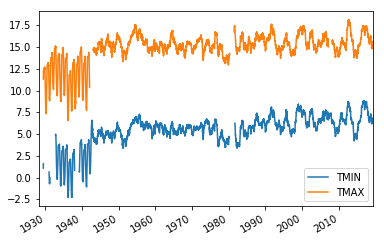

In [252]:
# And now we can do interesting things...

tminmax.rolling(365).mean().plot();

In [253]:
tminmax["TAVG"] = (tminmax["TMIN"] + tminmax["TMAX"])/2
tminmax

,TMIN,TMAX,TAVG
1928-02-29,-2.8,3.9,0.55
1928-03-01,-6.7,2.2,-2.25
1928-03-02,-3.9,5.6,0.85
1928-03-03,-9.4,2.8,-3.30
1928-03-04,-8.9,5.0,-1.95
1928-03-05,-13.3,-2.2,-7.75
1928-03-06,-5.6,3.3,-1.15
1928-03-07,-2.2,6.1,1.95
1928-03-08,-2.2,5.6,1.70
1928-03-09,-2.8,3.9,0.55


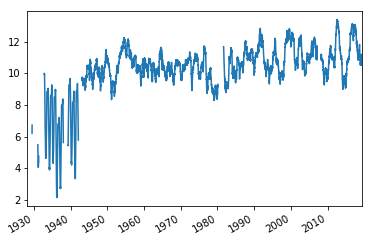

In [254]:
tminmax["TAVG"].rolling(365).mean().plot();

<br><br>

<p style="font-size: 2em"><b>Important point about the process:</b> I didn't know how to do any of that. I web-searched for every single command and Google <i>autocompleted each search</i>.</p>

<br>

<p style="font-size: 2em">There are <i>a lot</i> of people using these tools, all asking the same questions (and getting answers on blogs, StackOverflow, the documentation, etc.).

In [13]:
# Now let's do a particle physics example.
# 
# What do we do about the fact that there's a variable number of muons per event?

uproot.open("data/HZZ.root")["events"].pandas.df(["EventWeight", "MET_*", "Muon_*"], flatten=False)

,EventWeight,MET_px,MET_py,Muon_Px,Muon_Py,Muon_Pz,Muon_E,Muon_Charge,Muon_Iso
entry,,,,,,,,,
0,0.009271,5.912771,2.563633,"[-52.899456, 37.73778]","[-11.654672, 0.6934736]","[-8.160793, -11.307582]","[54.7795, 39.401695]","[1, -1]","[4.2001534, 2.1510613]"
1,0.000331,24.765203,-16.349110,[-0.81645936],[-24.404259],[20.199968],[31.690445],[1],[2.1880474]
2,0.005080,-25.785088,16.237131,"[48.98783, 0.8275667]","[-21.723139, 29.800508]","[11.168285, 36.96519]","[54.739788, 47.488857]","[1, -1]","[1.4128217, 3.3835042]"
3,0.007081,8.619896,-22.786547,"[22.088331, 76.69192]","[-85.835464, -13.956494]","[403.84845, 335.0942]","[413.46002, 344.04153]","[-1, 1]","[2.7284882, 0.5522966]"
4,0.008536,5.393139,-1.310052,"[45.17132, 39.750957]","[67.24879, 25.403667]","[-89.69573, 20.115053]","[120.86432, 51.28461]","[-1, 1]","[0.0, 0.8563976]"
5,0.008829,-3.759475,-19.417021,"[9.22811, -5.793715]","[40.55438, -30.295189]","[-14.642164, 42.954376]","[44.093307, 52.881523]","[1, -1]","[0.0, 1.4929442]"
6,0.006079,23.962149,-9.049156,"[12.538717, 29.54184]","[-42.54871, -4.4455166]","[-124.44899, -26.356554]","[132.11803, 39.839203]","[-1, -1]","[0.6231756, 0.0]"
7,0.008829,-57.533348,-20.487679,[34.88376],[-15.982724],[155.53117],[160.19452],[1],[2.4025257]
8,0.009445,42.416195,-94.350861,"[-53.166973, 11.49187]","[92.02971, -4.4173865]","[35.638836, -17.473787]","[112.09965, 21.375706]","[-1, 1]","[0.0, 0.0]"


In [16]:
# uproot's flatten=True (default) turns creates a structured index like the year-month-day example.
# 
# See "entry" and "subentry"?

muondf = uproot.open("data/HZZ.root")["events"].pandas.df(["EventWeight", "MET_*", "Muon_*"], flatten=True)
muondf

EventWeight     MET_px     MET_py     Muon_Px    Muon_Py  \
entry subentry                                                             
0     0            0.009271   5.912771   2.563633  -52.899456 -11.654672   
      1            0.009271   5.912771   2.563633   37.737782   0.693474   
1     0            0.000331  24.765203 -16.349110   -0.816459 -24.404259   
2     0            0.005080 -25.785088  16.237131   48.987831 -21.723139   
      1            0.005080 -25.785088  16.237131    0.827567  29.800508   
3     0            0.007081   8.619896 -22.786547   22.088331 -85.835464   
      1            0.007081   8.619896 -22.786547   76.691917 -13.956494   
4     0            0.008536   5.393139  -1.310052   45.171322  67.248787   
      1            0.008536   5.393139  -1.310052   39.750957  25.403667   
5     0            0.008829  -3.759475 -19.417021    9.228110  40.554379   
      1            0.008829  -3.759475 -19.417021   -5.793715 -30.295189   
6     0            0.006079  23.962149  -9.049156   12.538717 -42.548710   
      1            0.006079  23.962149  -9.049156   29.541840  -4.445517   
7     0            0.008829 -57.533348 -20.487679   34.883759 -15.982724   
8     0            0.009445  42.416195 -94.350861  -53.166973  92.029709   
      1            0.009445  42.416195 -94.350861   11.491870  -4.417387   
9     0            0.009271  -1.914469 -23.963034  -67.014854  53.159172   
      1            0.009271  -1.914469 -23.963034  -18.118755 -35.106167   
10    0            0.009271  19.710058   4.645509   15.983028  49.113922   
      1            0.009271  19.710058   4.645509   34.684406 -30.967381   
11    0            0.008829 -35.538055 -14.753822  -70.511909 -27.018003   
      1            0.008829 -35.538055 -14.753822  -38.028744  33.250092   
12    0            0.009271  15.209903  -6.397500   58.943813  53.778435   
13    0            0.009445  28.459160   5.657520  -15.587871 -21.090380   
14    0            0.005080  -9.093978   0.861486 -122.330116  37.771309   
      1            0.005080  -9.093978   0.861486   -1.059753  49.608921   
15    0            0.008529   0.350357  -4.255576  -46.704155 -28.666719   
      1            0.008529   0.350357  -4.255576   39.020023  18.711084   
16    0            0.008572  -0.201901  -3.499514   51.294659 -16.858574   
      1            0.008572  -0.201901  -3.499514   17.450920  25.667665   
...                     ...        ...        ...         ...        ...   
2398  0            0.000620   1.150845  -3.101060    9.655233 -22.177263   
2399  0            0.008572   4.515370  -4.102074   52.586819   5.415618   
      1            0.008572   4.515370  -4.102074  -19.218178  -1.992126   
2400  0            0.001141 -10.098569 -54.974846   57.859886  15.802021   
      1            0.001141 -10.098569 -54.974846    1.737445  56.352654   
2401  0            0.008829   2.998099  21.993523   -1.492689 -35.336575   
2402  0            0.009445  27.944883 -37.503429   -4.560287  39.478573   
2403  0            0.009260   3.787466 -21.217653   -9.715589 -29.786343   
2404  0            0.008829   9.378232  27.572329  -31.072098 -55.729004   
2405  0            0.008572 -17.310106   5.082886   47.484627  22.261318   
      1            0.008572 -17.310106   5.082886    4.695312  35.813728   
2406  0            0.000241 -81.965927 -11.167821   74.756172 -14.697798   
      1            0.000241 -81.965927 -11.167821  -20.911081  23.299616   
2407  0            0.008013  -9.059591 -24.464552   25.786427  37.408089   
      1            0.008013  -9.059591 -24.464552  -29.265024  -0.183838   
2409  0            0.008572  29.691553  56.606071  -24.736799  20.442957   
2410  0            0.003322 -25.754967  14.037041   53.005814 -24.486130   
      1            0.003322 -25.754967  14.037041  -30.208649  19.269384   
2411  0            0.009040  -2.426847 -30.494087   55.720299  26.369698   
      1            0.009040  -2.426847 -30.494087  -26.914448  -

In [17]:
# The opposite of stack (which moved day-of-month from columns to rows) is unstack:
# 
# This dataset has at most 4 muons, labeled [0, 1, 2, 3]

wide_form = muondf[["Muon_Px", "Muon_Py", "Muon_Pz", "Muon_E"]].unstack()
wide_form

Muon_Px                             Muon_Py             \
subentry           0          1         2   3          0          1   
entry                                                                 
0         -52.899456  37.737782       NaN NaN -11.654672   0.693474   
1          -0.816459        NaN       NaN NaN -24.404259        NaN   
2          48.987831   0.827567       NaN NaN -21.723139  29.800508   
3          22.088331  76.691917       NaN NaN -85.835464 -13.956494   
4          45.171322  39.750957       NaN NaN  67.248787  25.403667   
5           9.228110  -5.793715       NaN NaN  40.554379 -30.295189   
6          12.538717  29.541840       NaN NaN -42.548710  -4.445517   
7          34.883759        NaN       NaN NaN -15.982724        NaN   
8         -53.166973  11.491870       NaN NaN  92.029709  -4.417387   
9         -67.014854 -18.118755       NaN NaN  53.159172 -35.106167   
10         15.983028  34.684406       NaN NaN  49.113922 -30.967381   
11        -70.511909 -38.028744       NaN NaN -27.018003  33.250092   
12         58.943813        NaN       NaN NaN  53.778435        NaN   
13        -15.587871        NaN       NaN NaN -21.090380        NaN   
14       -122.330116  -1.059753       NaN NaN  37.771309  49.608921   
15        -46.704155  39.020023       NaN NaN -28.666719  18.711084   
16         51.294659  17.450920       NaN NaN -16.858574  25.667665   
17         43.281200        NaN       NaN NaN -17.844954        NaN   
18        -45.923935  22.549767       NaN NaN  15.232709  -3.657157   
19         43.293606 -33.281582 -4.376191 NaN  25.702820   6.875354   
20        -27.438150  28.944164       NaN NaN -52.504131  11.227525   
21        -24.200502  26.489935       NaN NaN  31.072050  13.596090   
22         41.231430 -39.878323       NaN NaN  30.713352  -4.660213   
23        -29.219208        NaN       NaN NaN -47.152077        NaN   
24        -61.252380        NaN       NaN NaN -13.579992        NaN   
25          7.968411 -15.082005       NaN NaN  51.326374 -31.876598   
26          8.993957        NaN       NaN NaN -24.181757        NaN   
27        -28.640575        NaN       NaN NaN  41.363476        NaN   
28         22.636904 -28.212503       NaN NaN -66.997551   4.614661   
29         59.974804 -46.908054       NaN NaN  38.377888  -7.244720   
...              ...        ...       ...  ..        ...        ...   
2390      -19.984333        NaN       NaN NaN  19.773554        NaN   
2391        3.851250        NaN       NaN NaN -29.797192        NaN   
2392      -69.277649        NaN       NaN NaN  15.449183        NaN   
2393       88.589264  39.023483       NaN NaN -17.043919  12.401696   
2394      -17.054625  21.603334       NaN NaN  22.076391  17.498446   
2395      -56.901257        NaN       NaN NaN   0.508773        NaN   
2396      -50.771999 -36.448807       NaN NaN  94.879066 -18.530548   
2397      -42.396080  27.120625       NaN NaN -54.318733  -2.628644   
2398        9.655233        NaN       NaN NaN -22.177263        NaN   
2399       52.586819 -19.218178       NaN NaN   5.415618  -1.992126   
2400       57.859886   1.737445       NaN NaN  15.802021  56.352654   
2401       -1.492689        NaN       NaN NaN -35.336575        NaN   
2402       -4.560287        NaN       NaN NaN  39.478573        NaN   
2403       -9.715589        NaN       NaN NaN -29.786343        NaN   
2404      -31.072098        NaN       NaN NaN -55.729004        NaN   
2405       47.484627   4.695312       NaN NaN  22.261318  35.813728   
2406       74.756172 -20.911081       NaN NaN -14.697798  23.299616   
2407       25.786427 -29.265024       NaN NaN  37.408089  -0.183838   
2409      -24.736799        NaN       NaN NaN  20.442957        NaN   
2410       53.005814 -30.208649       NaN NaN -24.486130  19.269384   
2411       55.720299 -26.914448       NaN NaN  26.369698  -9.812821   
2412       14.896802        NaN       NaN NaN  31.973597        NaN   
2413      -24.158083        NaN      

In [11]:
# Column names in the wide form are not strings but (string, int) tuples.

wide_form[("Muon_Px", 0)]

entry
0       -52.899456
1        -0.816459
2        48.987831
3        22.088331
4        45.171322
5         9.228110
6        12.538717
7        34.883759
8       -53.166973
9       -67.014854
10       15.983028
11      -70.511909
12       58.943813
13      -15.587871
14     -122.330116
15      -46.704155
16       51.294659
17       43.281200
18      -45.923935
19       43.293606
20      -27.438150
21      -24.200502
22       41.231430
23      -29.219208
24      -61.252380
25        7.968411
26        8.993957
27      -28.640575
28       22.636904
29       59.974804
           ...    
2390    -19.984333
2391      3.851250
2392    -69.277649
2393     88.589264
2394    -17.054625
2395    -56.901257
2396    -50.771999
2397    -42.396080
2398      9.655233
2399     52.586819
2400     57.859886
2401     -1.492689
2402     -4.560287
2403     -9.715589
2404    -31.072098
2405     47.484627
2406     74.756172
2407     25.786427
2409    -24.736799
2410     53.005814
2411     55.720299
2412  

In [18]:
# But what do you do if you have muons AND jets? Pandas's structured index can't do both.
# 
# (Muon subindex #1 is not necessarily jet subindex #1: they must be separately indexed things.)
# 
# A table for each particle?

jetdf = uproot.open("data/HZZ.root")["events"].pandas.df("Jet_*")
jetdf

Jet_Px     Jet_Py      Jet_Pz       Jet_E  Jet_btag  \
entry subentry                                                            
1     0         -38.874714  19.863453   -0.894942   44.137363 -1.000000   
3     0         -71.695213  93.571579  196.296432  230.346008 -1.000000   
      1          36.606369  21.838793   91.666283  101.358841 -1.000000   
      2         -28.866419   9.320708   51.243221   60.084141 -1.000000   
4     0           3.880162 -75.234055 -359.601624  367.585480 -1.000000   
      1           4.979580 -39.231731   68.456718   79.242271 -1.000000   
5     0         -46.327522  27.258848   51.400505   74.442833 -1.000000   
      1          27.738111 -14.541778    5.284866   32.552982 -1.000000   
6     0         -82.065735  47.651886 -262.335785  279.421295 -1.000000   
7     0          27.919559 -32.921207  231.001450  235.107407 -1.000000   
9     0          37.885761  -8.892708  -69.188087   79.851379 -1.000000   
10    0         -54.197659  23.506666  160.165588  171.148270 -1.000000   
      1           3.656719 -50.271664  142.217361  151.157669  3.207884   
12    0         -43.283173 -65.857613  -43.712482   91.224571 -1.000000   
13    0         -15.527268  26.747984   67.849937   74.608643 -1.000000   
14    0          88.345207 -55.605007 -205.894012  231.315689 -1.000000   
16    0         -49.186825  44.336395  -66.452919   94.164284 -1.000000   
      1         -18.017849 -48.778217  -92.907753  106.659691 -1.000000   
17    0         -62.433434  26.889862  -43.744808   81.206017 -1.000000   
      1          33.661480  21.909698  -77.631493   87.631020 -1.000000   
18    0          31.496529 -17.628218  -62.281590   72.256630 -1.000000   
19    0          21.356445  62.523724   -5.783510   67.663261 -1.000000   
      1         -27.649799  44.137402   -0.139168   52.654499 -1.000000   
20    0         -15.204810  29.081993  -33.581448   47.170334 -1.000000   
21    0          13.493674 -59.114990  137.716034  150.827789  2.585097   
22    0          -2.692386 -40.983822  101.094048  109.281815 -1.000000   
23    0          -8.481218  67.852570  -72.555374  100.248306 -1.000000   
24    0         -40.948154 -31.721567  -80.551651   96.231735 -1.000000   
      1         -16.573097 -29.425585  150.391373  154.289047 -1.000000   
25    0          40.368301 -16.769096  -74.865913   87.223442 -1.000000   
...                    ...        ...         ...         ...       ...   
2391  0          -4.742380  56.091209 -129.030014  141.315155 -1.000000   
      1          -3.054193 -33.274586   47.608665   58.332970 -1.000000   
2392  0          34.514290  19.595373  159.818192  164.984863 -1.000000   
      1          11.814186 -36.468834   -0.617032   38.886219 -1.000000   
2393  0        -118.924904  12.692534  323.857666  345.586243 -1.000000   
2395  0          67.195717 -37.849674  229.787064  242.895264 -1.000000   
2399  0         -14.701201  43.688679 -121.739861  130.393311 -1.000000   
2400  0         -31.822039 -29.555544   24.947851   50.824226  3.887241   
      1           1.661642 -31.598680  -23.842299   40.205891 -1.000000   
2403  0         -81.298149  61.513458  102.149010  144.746582 -1.000000   
      1          63.180172  -2.269192 -272.999573  280.414673 -1.000000   
      2           4.665481 -33.493698 -191.359802  194.420197 -1.000000   
2404  0          41.722126  21.268991  -44.156391   64.735176 -1.000000   
2407  0          -3.832386 -42.640072   16.020187   47.170399 -1.000000   
2408  0         -61.596336   3.162532 -104.307426  121.700035 -1.000000   
      1          35.465157 -30.902594 -171.794464  178.305206  1.711165   
      2          31.839626  -1.204536    4.635928   32.750664 -1.000000   
      3         -11.324151  27.924454 -107.529564  111.857574  1.910891   
2409  0         -46.968315 -45.792961  206.192902  216.482285 -1.000000   
      1          53.956257 -28.421837  154.604080  166.761597 -1.000000   
2412  0         -25.620922 -20.614462 -112.77